In [5]:
#!/usr/local/bin/env python
from __future__ import division
import time
from copy import deepcopy
import numpy as np
from numpy.random import random_sample as rs
from scipy.stats.mstats import mquantiles as mq
from radd import build, fit, vis

In [2]:
rr=dict(deepcopy(redf_store.rebsl_boot_popt))

In [6]:
dirpath = pth+'ELife/XTESTS/'
if not os.path.isdir(dirpath):
      os.mkdir(dirpath)
os.chdir(dirpath)
reinits = dict(deepcopy(redf_store.rebsl_boot_popt))
#inits['ssv']=-abs(reinits['ssv'])
data = prodf_store['prodata']
inits = dict(deepcopy(ttheta))
#vinits = dict(deepcopy(vtheta))
#inits['a']=np.mean([tinits['a'], vinits['a']])
#inits['z']=np.mean([tinits['z'], vinits['z']])
inits['v'] = np.mean(vopt.values())
inits['tr'] = np.mean(topt.values())
#inits['ssv']=-abs(reinits['ssv'])
#inits['tr'] = np.mean(topt.values())
inits['xb']=2
if 'ssv' in inits.keys():
      del inits['ssv']
inits['a'] = inits['a'] - inits['z']
del inits['z']

In [7]:
m = build.Model( data=data, inits=inits, kind='xpro', fit_on='average', depends_on={'tr':'pGo'}, weighted=True)


      Model is prepared to fit on average xpro data, allowing
      Onset Time to vary across levels of pGo (0, 20, 40, 60, 80, 100) 

      I wish you a steep gradient, and a happy Nature paper 


In [8]:
m.wts

array([ 1.65825209,  0.99398646,  0.85543784,  1.        ,  2.31727645,
        2.31727645,  0.27620745,  0.52553195,  0.91749432,  2.14560796,
        1.41000998,  0.04186772,  0.15626717,  0.27937158,  0.35727406,
        0.1821659 ])

In [9]:
m.optimize(ntrials=10000, ftol=1.e-10, xtol=1.e-10, maxfev=10000)
m.fitinfo

Optimization terminated successfully.
         Current function value: 0.000028
         Iterations: 109
         Function evaluations: 285
Optimization terminated successfully.
         Current function value: 0.063066
         Iterations: 161
         Function evaluations: 418


{'AIC': -67.749060050727891,
 'BIC': -63.113527717289202,
 'CNVRG': True,
 'a': 0.47100272162359924,
 'chi': 0.068444563031965819,
 'nfev': 418,
 'rchi': 0.0068444563031965821,
 'tr_0': 0.36438393826772508,
 'tr_100': 0.2960849920457273,
 'tr_20': 0.37038733433135423,
 'tr_40': 0.32948407008665886,
 'tr_60': 0.31952942143997992,
 'tr_80': 0.26257892337975736,
 'v': 1.7121952741749245,
 'xb': 0.82112260945361037}

In [10]:
m.fits

array([ 0.93957808,  0.97347017,  0.43778147,  0.26530612, -0.04391669,
        0.1076151 ,  0.49818235,  0.51604767,  0.51948186,  0.51675234,
        0.54774904,  0.53337636,  0.54306195,  0.54492728,  0.54805333,
        0.55508512])

In [112]:
m.avg_y

array([ 0.92848361,  0.75532787,  0.47807377,  0.24036885,  0.03545082,
        0.00488927,  0.50642647,  0.53373504,  0.54119369,  0.5445324 ,
        0.55062386,  0.53365569,  0.54400242,  0.54471142,  0.54586833,
        0.55455077])

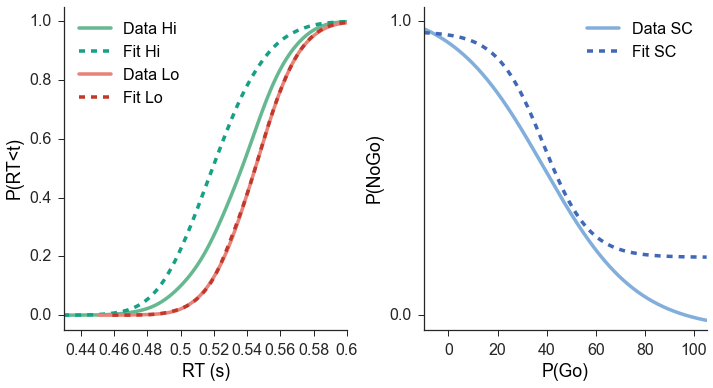

In [11]:
yhat = m.simulate()
vis.plot_fits(m.avg_y, m.fits, plot_acc=True, kind='pro', bw=.02, save=False, savestr='simulated_xpro_v5')

In [97]:
m.wts

array([ 1.5       ,  1.        ,  1.        ,  1.        ,  2.        ,
        2.        ,  0.27620745,  0.52553195,  0.91749432,  2.14560796,
        1.41000998,  0.04186772,  0.15626717,  0.27937158,  0.35727406,
        0.1821659 ])

In [ ]:
def analyze_pro(DVg, DVs, p):

      a, tr, v, z = m.opt.simulator.vectorize_params(p, sim_info=False)
      dt=.0005; ncond=m.ncond; tb=m.tb; prob=m.opt.simulator.prob

      rt = (tr+(np.where((DVg.max(axis=2).T>=a).T, np.argmax((DVg.T>=a).T,axis=2)*dt, 999).T)).T
      ertx = (tr+(np.where((DVg[:, :nss, :].max(axis=2).T>=a).T, np.argmax((DVg[:, :nss, :].T>=a).T,axis=2)*dt, np.nan).T)).T
      ssrt = np.where(np.any(DVs<=0, axis=3), ssd[:, None]+np.argmax(DVs<=0, axis=3)*dt,np.nan)

      # compute RT quantiles for correct and error resp.
      ert = np.array([ertx[i] * np.ones_like(ssrt[i]) for i in range(ncond)])
      if len(m.avg_y)<=(len(prob)+1):
            qrt = mq(rt[rt<tb], prob=prob)*10
      else:
            hi = np.hstack(rt[ncond/2:])
            lo = np.hstack(rt[:ncond/2])
            hilo = [hi[hi<tb], lo[lo<tb]]
            
            # compute RT quantiles for correct and error resp.
            qrt = np.hstack([mq(rti[rti<tb], prob=prob)*10 for rti in hilo])
      
      # Get response and stop accuracy information
      pgo = 1-np.mean(np.where(grt<tb, 1, 0), axis=1)
      np.append(np.where(grt<tb, 1, 0), np.where(ert<ssrt, 0, 1)) 
      return np.hstack([pgo, qrt])
